## Import Libraries & Load Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense , Dropout , Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

Found 251 files belonging to 3 classes.


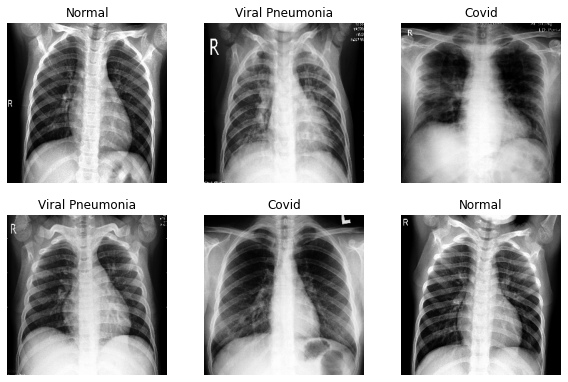

In [2]:
train_pic = image_dataset_from_directory("/content/drive/MyDrive/Covid19-dataset/train",seed=20)
labels = train_pic.class_names
plt.figure(figsize=(10,10))
for img, label in train_pic.take(1):
  for i in range(6):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")

In [3]:
image_generator = ImageDataGenerator(
    rescale = 1.0/255.0,
    shear_range = 0.2,
    horizontal_flip = True
)
image_generator_test = ImageDataGenerator(
    rescale = 1.0/255.0
)

In [4]:
train = image_generator.flow_from_directory(
    "/content/drive/MyDrive/Covid19-dataset/train",
    class_mode="categorical",
    target_size=(150,150),
    batch_size=30,
)

Found 251 images belonging to 3 classes.


In [5]:
test = image_generator.flow_from_directory(
    "/content/drive/MyDrive/Covid19-dataset/test",
    class_mode="categorical",
    target_size=(150,150),
    batch_size=30,
)

Found 66 images belonging to 3 classes.


## CNN

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

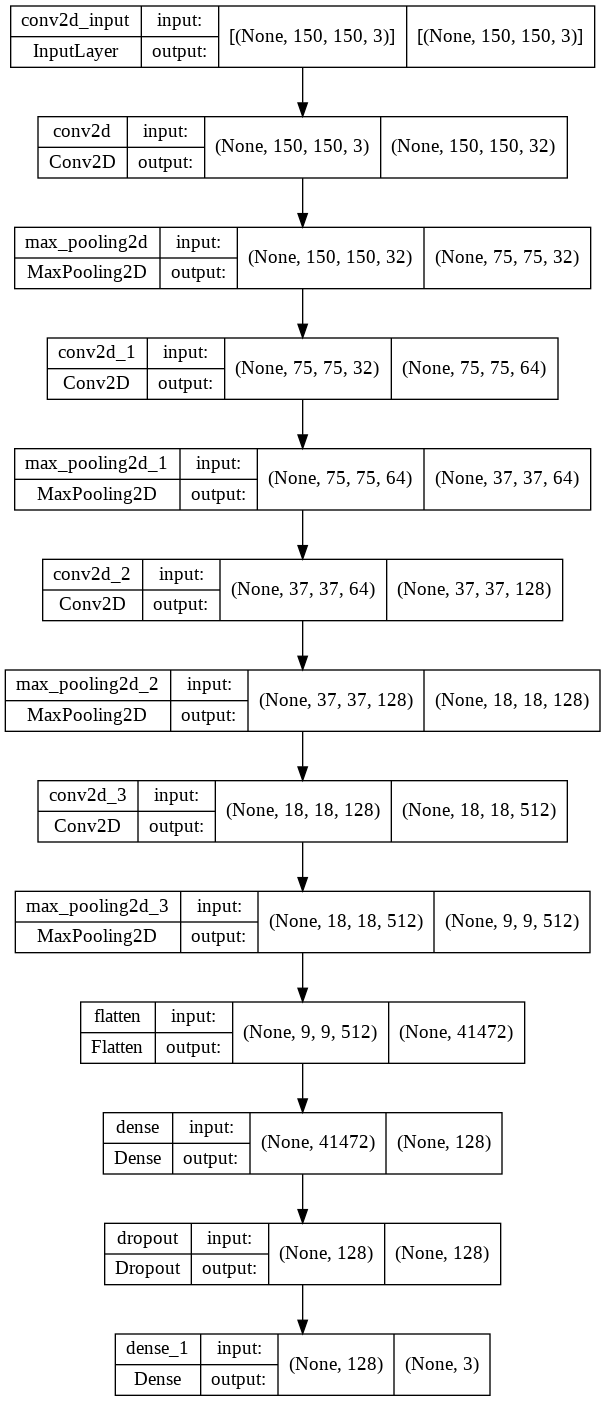

In [8]:
plot_model(model,show_shapes=True)

In [9]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("XRay_model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [10]:
history = model.fit_generator(
    train,
    steps_per_epoch=len(train),
    epochs=30,
    validation_data=test,
    validation_steps=len(test),
    callbacks=[checkpoint]
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
9/9 [==============================] - 51s 6s/step - loss: 1.1484 - accuracy: 0.4861 - val_loss: 0.9411 - val_accuracy: 0.6212
Epoch 2/30
9/9 [==============================] - 38s 4s/step - loss: 0.6611 - accuracy: 0.7649 - val_loss: 0.5095 - val_accuracy: 0.7424
Epoch 3/30
9/9 [==============================] - 38s 4s/step - loss: 0.3840 - accuracy: 0.8566 - val_loss: 0.5725 - val_accuracy: 0.7424
Epoch 4/30
9/9 [==============================] - 39s 4s/step - loss: 0.4346 - accuracy: 0.8287 - val_loss: 0.5119 - val_accuracy: 0.7576
Epoch 5/30
9/9 [==============================] - 37s 4s/step - loss: 0.3807 - accuracy: 0.8765 - val_loss: 0.4405 - val_accuracy: 0.8485
Epoch 6/30
9/9 [==============================] - 37s 4s/step - loss: 0.2903 - accuracy: 0.8964 - val_loss: 0.3738 - val_accuracy: 0.8636
Epoch 7/30
9/9 [==============================] - 37s 4s/step - loss: 0.2399 - accuracy: 0.8884 - val_loss: 0.2743 - val_accuracy: 0.9242
Epoch 8/30
9/9 [==================

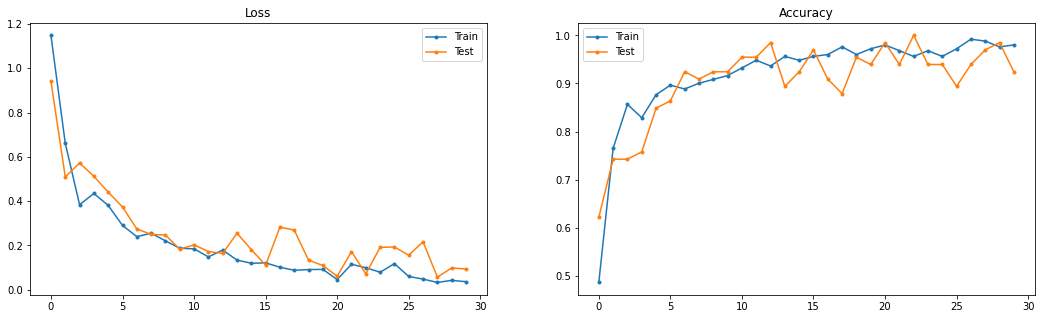

In [11]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()